In [1]:
paciente='paciente2'

In [2]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

13931

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

13931

In [9]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

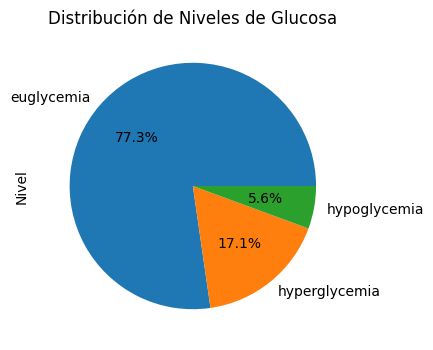

In [10]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [11]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       10767
hyperglycemia     2383
hypoglycemia       781
Name: Nivel, dtype: int64

In [12]:
df_Y_scaled

,Glucose level,Nivel
0,196.0,hyperglycemia
1,189.0,hyperglycemia
2,183.0,hyperglycemia
3,177.0,euglycemia
4,181.0,hyperglycemia
...,...,...
13926,95.0,euglycemia
13927,105.0,euglycemia
13928,109.0,euglycemia
13929,104.0,euglycemia


## Paso 1

In [13]:
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [14]:
print(len(XP[2]))

2786


In [15]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [16]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [17]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1964
Program finished in 2.2790266999945743 seconds - using multiprocessing
1 3925
Program finished in 2.247040999995079 seconds - using multiprocessing
2 5604
Program finished in 2.86634100000083 seconds - using multiprocessing
3 7574
Program finished in 2.220466099999612 seconds - using multiprocessing
4 9543
Program finished in 2.1146371999930125 seconds - using multiprocessing


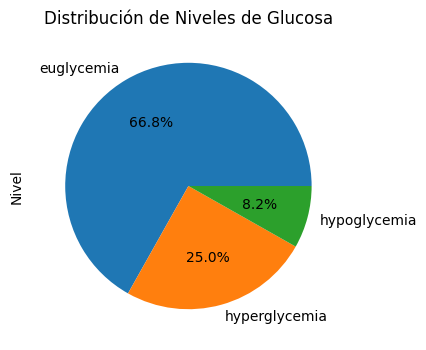

In [18]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [19]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       6379
hyperglycemia    2383
hypoglycemia      781
Name: Nivel, dtype: int64

<AxesSubplot: >

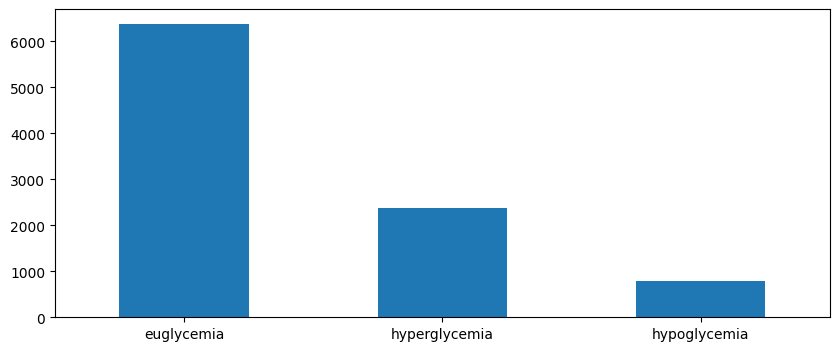

In [20]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [21]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [22]:
len(XNew)

9543

In [23]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [24]:
len(YNew)

9543

## Paso 2

In [25]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

1909


In [26]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1429
Program finished in 0.9724182999925688 seconds - using multiprocessing
1 2896
Program finished in 0.7231677999952808 seconds - using multiprocessing
2 4032
Program finished in 1.1968007999967085 seconds - using multiprocessing
3 5483
Program finished in 0.9732086000003619 seconds - using multiprocessing
4 6961
Program finished in 0.8663917999947444 seconds - using multiprocessing


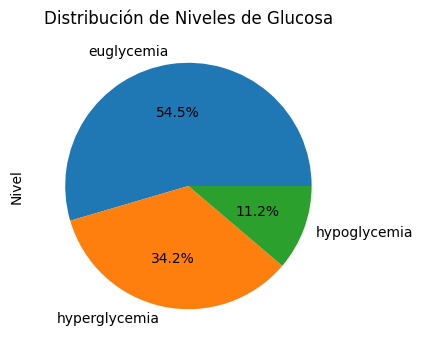

In [27]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [28]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       3797
hyperglycemia    2383
hypoglycemia      781
Name: Nivel, dtype: int64

## Paso 3

In [29]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

1392


In [30]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1108
Program finished in 0.3854347000014968 seconds - using multiprocessing
1 2252
Program finished in 0.30363959999522194 seconds - using multiprocessing
2 3099
Program finished in 0.6138532000040868 seconds - using multiprocessing
3 4254
Program finished in 0.33583250000083353 seconds - using multiprocessing
4 5371
Program finished in 0.36612580000655726 seconds - using multiprocessing


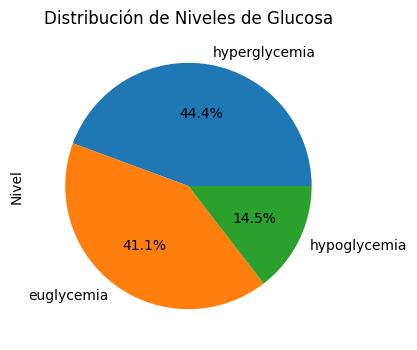

In [31]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [32]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2383
euglycemia       2207
hypoglycemia      781
Name: Nivel, dtype: int64

In [33]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [34]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [35]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1074
0 916
Program finished in 0.15813889999117237 seconds - using multiprocessing
1 1844
Program finished in 0.17020969999430235 seconds - using multiprocessing
2 2546
Program finished in 0.2601405000023078 seconds - using multiprocessing
3 3504
Program finished in 0.14913530000194442 seconds - using multiprocessing
4 4428
Program finished in 0.22749930000281893 seconds - using multiprocessing


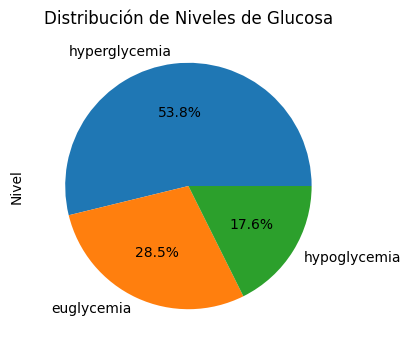

In [36]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [37]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2383
euglycemia       1264
hypoglycemia      781
Name: Nivel, dtype: int64

In [38]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

886
0 649
Program finished in 0.09160860000702087 seconds - using multiprocessing
1 1410
Program finished in 0.05966159999661613 seconds - using multiprocessing
2 2189
Program finished in 0.053652800008421764 seconds - using multiprocessing
3 2809
Program finished in 0.08606919999874663 seconds - using multiprocessing
4 3458
Program finished in 0.06983689998742193 seconds - using multiprocessing


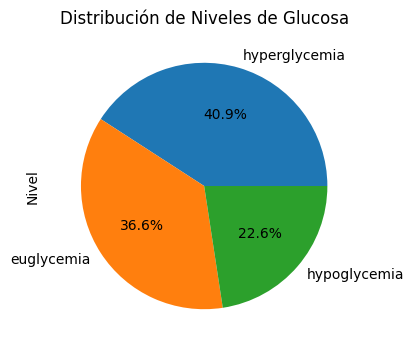

In [39]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [40]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1413
euglycemia       1264
hypoglycemia      781
Name: Nivel, dtype: int64

In [41]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [42]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [43]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

692
0 623
Program finished in 0.0362466999940807 seconds - using multiprocessing
1 1274
Program finished in 0.02824549999786541 seconds - using multiprocessing
2 1812
Program finished in 0.0464302000036696 seconds - using multiprocessing
3 2448
Program finished in 0.030971200001658872 seconds - using multiprocessing
4 3080
Program finished in 0.03000149999570567 seconds - using multiprocessing


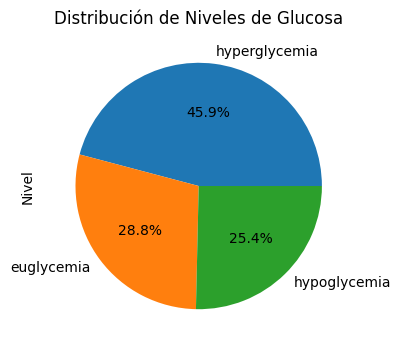

In [44]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [45]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1413
euglycemia        886
hypoglycemia      781
Name: Nivel, dtype: int64

In [46]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

616
0 511
Program finished in 0.043825100001413375 seconds - using multiprocessing
1 1086
Program finished in 0.02530300000216812 seconds - using multiprocessing
2 1658
Program finished in 0.02489689999492839 seconds - using multiprocessing
3 2149
Program finished in 0.03419459999713581 seconds - using multiprocessing
4 2658
Program finished in 0.038105999992694706 seconds - using multiprocessing


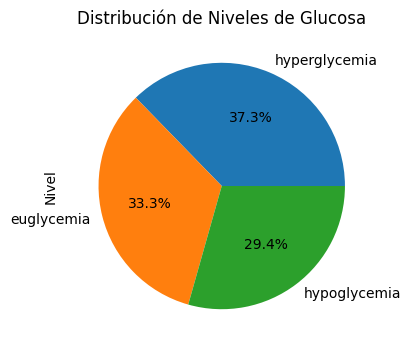

In [47]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [48]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    991
euglycemia       886
hypoglycemia     781
Name: Nivel, dtype: int64

In [49]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [50]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [51]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [52]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [53]:
len(array_Ytrain)

2658

In [54]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

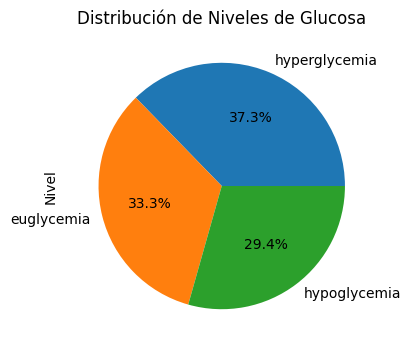

In [55]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [56]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    991
euglycemia       886
hypoglycemia     781
Name: Nivel, dtype: int64

In [57]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [58]:
minClass

781

In [59]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

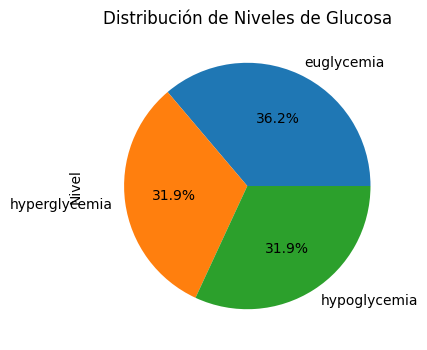

In [60]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [61]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       886
hyperglycemia    781
hypoglycemia     781
Name: Nivel, dtype: int64

In [62]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

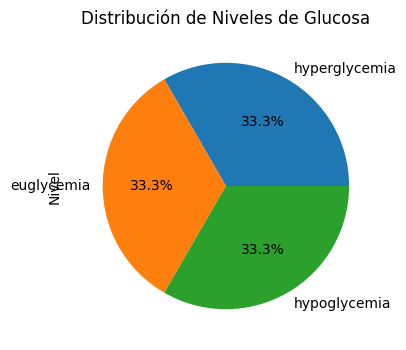

In [63]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [64]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    781
euglycemia       781
hypoglycemia     781
Name: Nivel, dtype: int64

<AxesSubplot: >

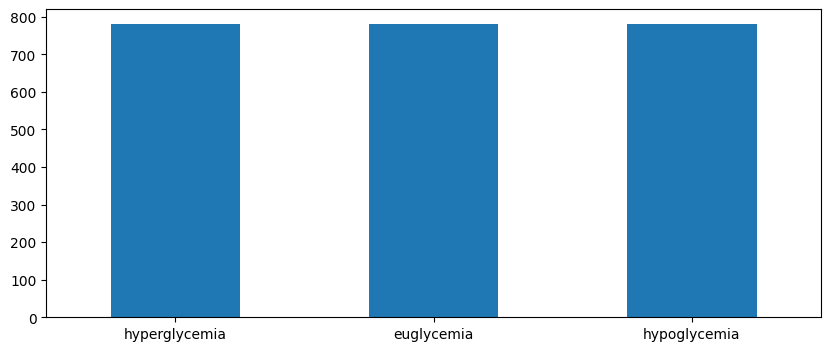

In [65]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [66]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [67]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [133]:
with open('dataset/generado/'+paciente+'/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [134]:
len(array_Xval)

1741

In [135]:
with open('dataset/generado/'+paciente+'/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [136]:
len(array_Yval)

1741

In [137]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

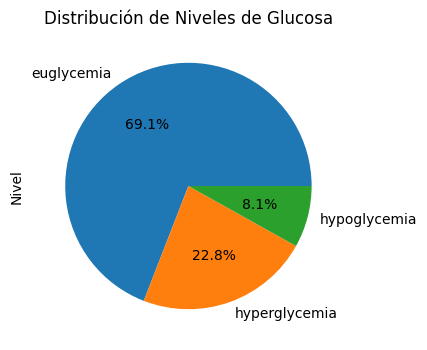

In [138]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [139]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       1203
hyperglycemia     397
hypoglycemia      141
Name: Nivel, dtype: int64

<AxesSubplot: >

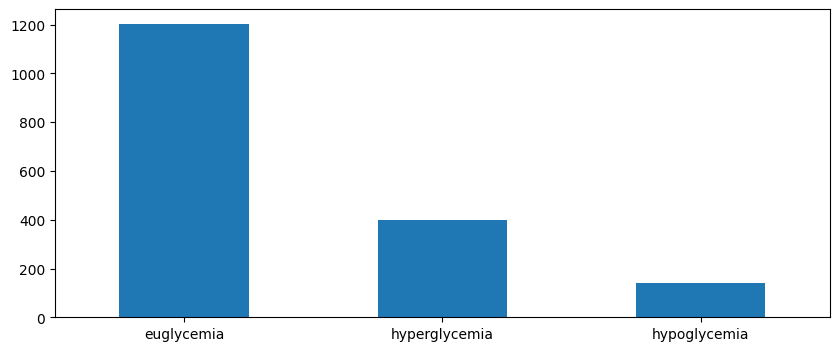

In [140]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [141]:
N=5
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

348


In [142]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xval.shape[1],array_Xval.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 265
Program finished in 0.026815100005478598 seconds - using multiprocessing
1 520
Program finished in 0.03063490000204183 seconds - using multiprocessing
2 756
Program finished in 0.033857100002933294 seconds - using multiprocessing
3 1012
Program finished in 0.025987000000895932 seconds - using multiprocessing
4 1247
Program finished in 0.02542449999600649 seconds - using multiprocessing


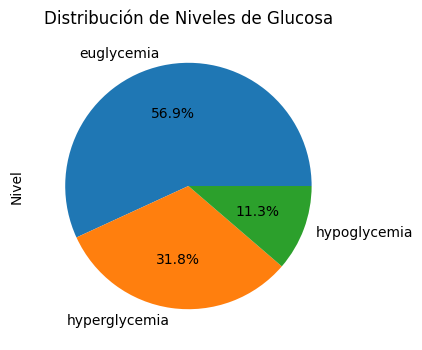

In [143]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [144]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       709
hyperglycemia    397
hypoglycemia     141
Name: Nivel, dtype: int64

In [145]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 211
Program finished in 0.02219390000391286 seconds - using multiprocessing
1 409
Program finished in 0.017688099993392825 seconds - using multiprocessing
2 591
Program finished in 0.02307680000376422 seconds - using multiprocessing
3 781
Program finished in 0.02589839999563992 seconds - using multiprocessing
4 964
Program finished in 0.033482799990451895 seconds - using multiprocessing


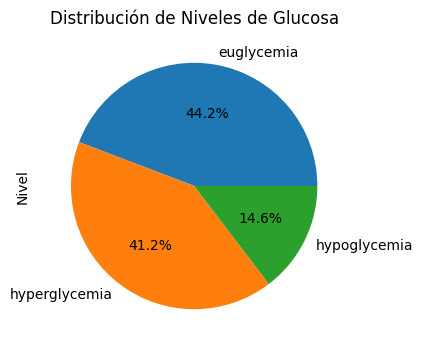

In [146]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [147]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       426
hyperglycemia    397
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

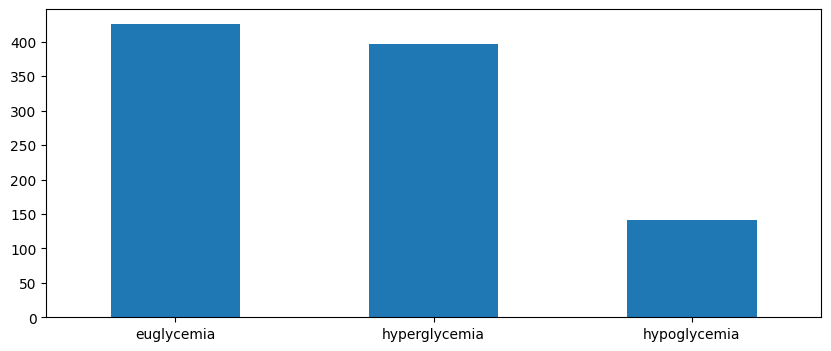

In [148]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [149]:
with open('dataset/generado/'+paciente+'/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [150]:
with open('dataset/generado/'+paciente+'/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [151]:
len(XNew)

964

In [152]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 170
Program finished in 0.023262199989403598 seconds - using multiprocessing
1 333
Program finished in 0.030379900010302663 seconds - using multiprocessing
2 483
Program finished in 0.021711800000048243 seconds - using multiprocessing
3 639
Program finished in 0.02086330000020098 seconds - using multiprocessing
4 789
Program finished in 0.01698370001395233 seconds - using multiprocessing


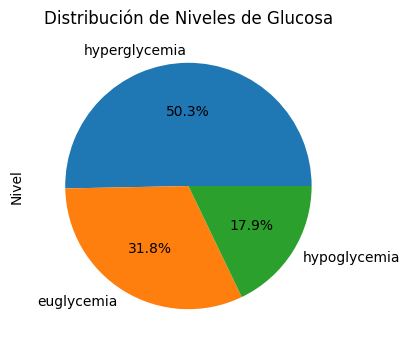

In [153]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [154]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    397
euglycemia       251
hypoglycemia     141
Name: Nivel, dtype: int64

In [155]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 121
Program finished in 0.018855999995139427 seconds - using multiprocessing
1 256
Program finished in 0.017427099999622442 seconds - using multiprocessing
2 375
Program finished in 0.018948199998703785 seconds - using multiprocessing
3 493
Program finished in 0.015670599997974932 seconds - using multiprocessing
4 626
Program finished in 0.017573899996932596 seconds - using multiprocessing


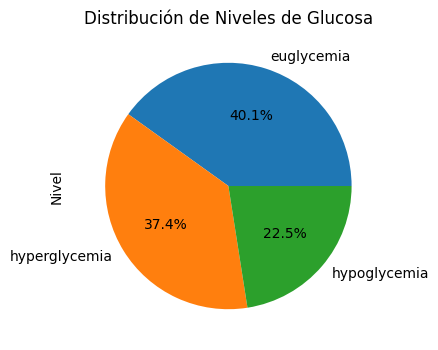

In [156]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [157]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       251
hyperglycemia    234
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

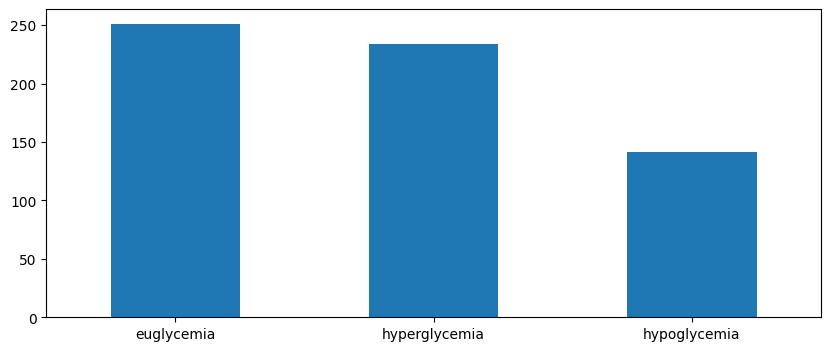

In [158]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [159]:
with open('dataset/generado/'+paciente+'/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [160]:
with open('dataset/generado/'+paciente+'/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [161]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.40,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 116
Program finished in 0.016730099989217706 seconds - using multiprocessing
1 221
Program finished in 0.016577300004428253 seconds - using multiprocessing
2 324
Program finished in 0.01696359999186825 seconds - using multiprocessing
3 427
Program finished in 0.0170771999983117 seconds - using multiprocessing
4 529
Program finished in 0.018842499994207174 seconds - using multiprocessing


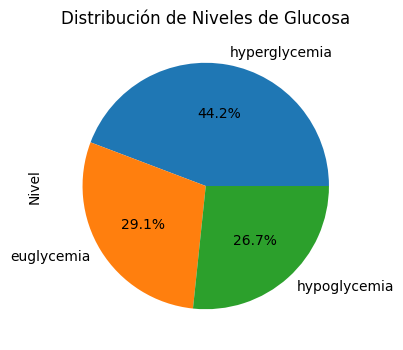

In [162]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [163]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    234
euglycemia       154
hypoglycemia     141
Name: Nivel, dtype: int64

In [164]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.40,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 91
Program finished in 0.024046799997449853 seconds - using multiprocessing
1 185
Program finished in 0.022086999990278855 seconds - using multiprocessing
2 265
Program finished in 0.02274109999416396 seconds - using multiprocessing
3 351
Program finished in 0.014055799998459406 seconds - using multiprocessing
4 442
Program finished in 0.012809799998649396 seconds - using multiprocessing


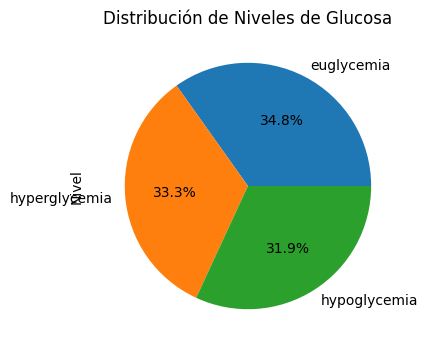

In [165]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [166]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       154
hyperglycemia    147
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

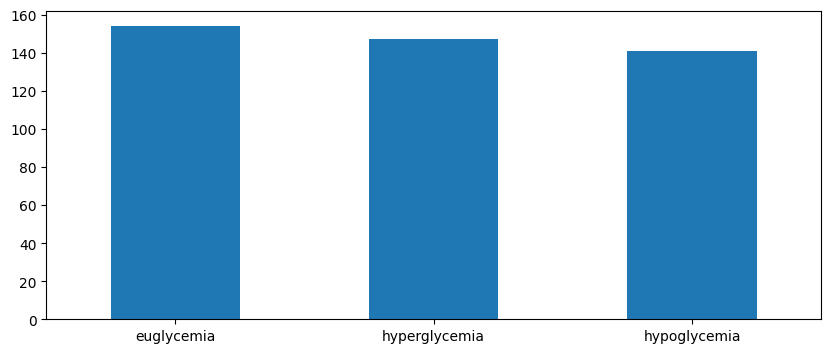

In [167]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [168]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [169]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [170]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'rb') as f:
    array_Xval = np.load(f)

In [171]:
len(array_Xval)

442

In [172]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'rb') as f:
    array_Yval = np.load(f)

In [173]:
len(array_Yval)

442

In [174]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

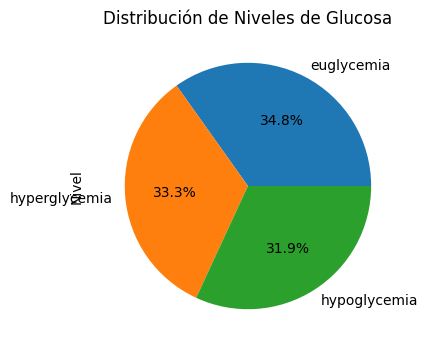

In [175]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [176]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       154
hyperglycemia    147
hypoglycemia     141
Name: Nivel, dtype: int64

In [177]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

141

In [178]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [179]:
len(YnewLabel)

436

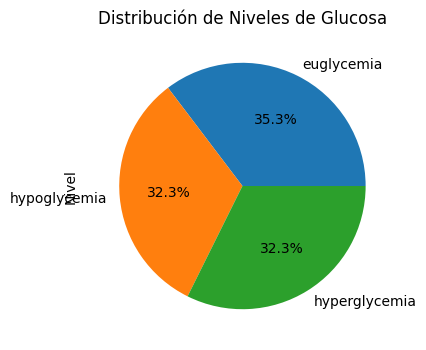

In [180]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [181]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       154
hypoglycemia     141
hyperglycemia    141
Name: Nivel, dtype: int64

In [182]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

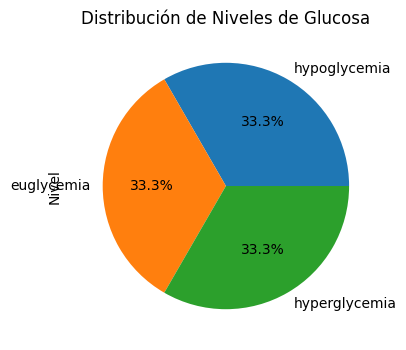

In [183]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [184]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     141
euglycemia       141
hyperglycemia    141
Name: Nivel, dtype: int64

<AxesSubplot: >

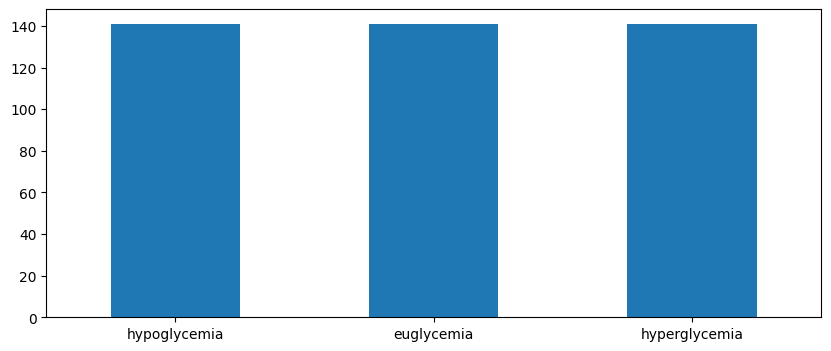

In [185]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [186]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [187]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)